# 03-Logistic Regression

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [13]:
len(dataset)

60000

In [14]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


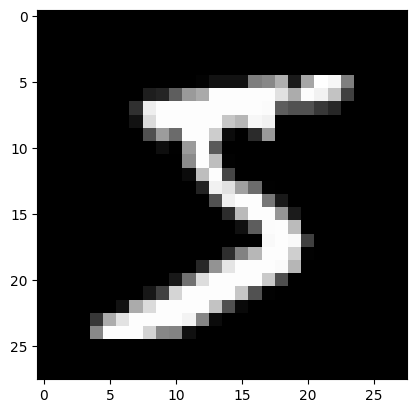

In [16]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


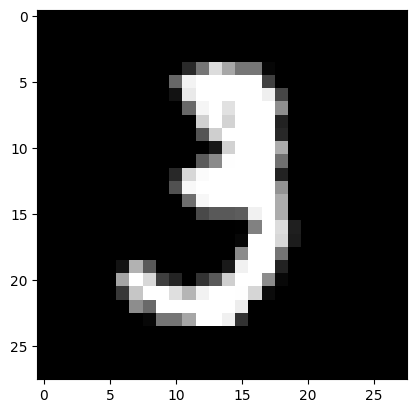

In [17]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [18]:
import torchvision.transforms as transforms

In [47]:
dataset_2 = MNIST(
    root='data/', train=True, 
    transform=transforms.ToTensor()            
)

In [48]:
img_tensor, label = dataset_2[0]
print(type(img_tensor))
print(img_tensor.shape, label)

<class 'torch.Tensor'>
torch.Size([1, 28, 28]) 5


In [37]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor, torch.min(img_tensor)))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

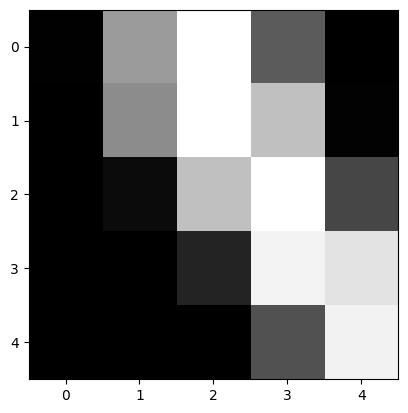

In [38]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [49]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset_2, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [50]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [41]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [42]:
model.weight.shape

torch.Size([10, 784])

In [43]:
model.weight

Parameter containing:
tensor([[-0.0042, -0.0097, -0.0241,  ..., -0.0112, -0.0181,  0.0223],
        [-0.0089,  0.0323, -0.0007,  ...,  0.0083,  0.0047,  0.0318],
        [ 0.0346, -0.0117, -0.0253,  ...,  0.0335, -0.0222, -0.0293],
        ...,
        [-0.0034, -0.0344,  0.0218,  ..., -0.0036, -0.0355,  0.0209],
        [-0.0025, -0.0313, -0.0127,  ..., -0.0115, -0.0302,  0.0302],
        [ 0.0222, -0.0093,  0.0211,  ..., -0.0229,  0.0166, -0.0325]],
       requires_grad=True)

In [44]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0041,  0.0154, -0.0307,  0.0329, -0.0056, -0.0022, -0.0253, -0.0167,
         0.0317, -0.0054], requires_grad=True)

In [52]:
for images, labels in train_loader:
    print(label, images.shape, sep="\n")
    outputs = model(image)
    print(outputs)
    break

5
torch.Size([128, 1, 28, 28])


TypeError: linear(): argument 'input' (position 1) must be Tensor, not Image

In [53]:
images.shape

torch.Size([128, 1, 28, 28])

In [56]:
images.reshape(128,-1).shape

torch.Size([128, 784])

In [57]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [58]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [60]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0095,  0.0013,  0.0030,  ...,  0.0259, -0.0130, -0.0133],
         [-0.0338,  0.0153, -0.0280,  ..., -0.0345,  0.0100, -0.0171],
         [ 0.0120, -0.0027,  0.0141,  ..., -0.0005,  0.0133,  0.0148],
         ...,
         [-0.0097, -0.0219,  0.0211,  ...,  0.0197, -0.0320,  0.0211],
         [ 0.0097,  0.0268,  0.0033,  ..., -0.0197, -0.0168,  0.0259],
         [ 0.0073, -0.0300, -0.0290,  ...,  0.0032, -0.0100, -0.0122]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0075, -0.0070,  0.0142, -0.0277,  0.0232, -0.0247,  0.0164, -0.0073,
          0.0331,  0.0355], requires_grad=True)]

In [61]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('output shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

output shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.0522,  0.3392,  0.3658,  0.1273,  0.1015, -0.2724,  0.0085,  0.2036,
          0.0665, -0.1045],
        [ 0.1700,  0.1404,  0.0243,  0.1185,  0.2145, -0.0408, -0.2299,  0.1924,
          0.0579, -0.0176]])


In [62]:
import torch.nn.functional as F

In [64]:
probs = F.softmax(outputs, dim=1)
print('Sample probabilities: \n', probs[:2].data)

print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.0863, 0.1276, 0.1310, 0.1032, 0.1006, 0.0692, 0.0917, 0.1114, 0.0971,
         0.0819],
        [0.1104, 0.1072, 0.0954, 0.1049, 0.1154, 0.0894, 0.0740, 0.1129, 0.0987,
         0.0915]])
Sum:  1.0000001192092896


In [65]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)


tensor([2, 4, 8, 1, 1, 3, 4, 1, 1, 1, 1, 8, 7, 1, 8, 1, 2, 8, 1, 4, 9, 8, 7, 4,
        4, 8, 8, 7, 1, 8, 3, 1, 1, 7, 7, 7, 1, 1, 7, 1, 7, 8, 2, 7, 8, 9, 8, 4,
        1, 3, 1, 1, 8, 7, 3, 7, 1, 1, 1, 7, 8, 3, 7, 2, 5, 1, 8, 4, 8, 7, 4, 7,
        4, 5, 8, 1, 0, 8, 7, 1, 1, 7, 8, 1, 1, 8, 7, 9, 1, 8, 4, 1, 1, 7, 7, 1,
        7, 8, 1, 1, 8, 8, 1, 1, 4, 1, 1, 1, 7, 7, 1, 9, 8, 1, 9, 3, 8, 4, 3, 8,
        1, 7, 1, 7, 1, 1, 7, 1])
tensor([0.1310, 0.1154, 0.1272, 0.1084, 0.1402, 0.1254, 0.1127, 0.1331, 0.1690,
        0.1500, 0.1534, 0.1184, 0.1366, 0.1084, 0.1375, 0.1327, 0.1253, 0.1378,
        0.1305, 0.1216, 0.1173, 0.1220, 0.1371, 0.1149, 0.1241, 0.1355, 0.1356,
        0.1404, 0.1302, 0.1191, 0.1431, 0.1504, 0.1624, 0.1391, 0.1186, 0.1266,
        0.1236, 0.1319, 0.1375, 0.1477, 0.1222, 0.1194, 0.1139, 0.1081, 0.1217,
        0.1149, 0.1286, 0.1347, 0.1448, 0.1121, 0.1487, 0.1458, 0.1256, 0.1270,
        0.1248, 0.1265, 0.1181, 0.1744, 0.1389, 0.1245, 0.1221, 0.1111, 0.1421,
       

## Evaluation Metrics and Loss Function

In [66]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [67]:
accuracy(outputs, labels)

tensor(0.0703)

In [69]:
loss_fn = F.cross_entropy

In [70]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3223, grad_fn=<NllLossBackward0>)


## Model Training 

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model = MnistModel()

In [77]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [87]:
def fit(epochs, lr, model, train_loader, val_loader,  opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []

    for epoch in range(epochs):
        # training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [83]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 0.6706136465072632, 'val_acc': 0.8495846390724182}

In [88]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5269, val_acc: 0.8671
Epoch [1], val_loss: 0.5232, val_acc: 0.8678
Epoch [2], val_loss: 0.5196, val_acc: 0.8683
Epoch [3], val_loss: 0.5162, val_acc: 0.8689
Epoch [4], val_loss: 0.5129, val_acc: 0.8695
Epoch [0], val_loss: 0.5097, val_acc: 0.8703
Epoch [1], val_loss: 0.5067, val_acc: 0.8707
Epoch [2], val_loss: 0.5037, val_acc: 0.8714
Epoch [3], val_loss: 0.5008, val_acc: 0.8717
Epoch [4], val_loss: 0.4981, val_acc: 0.8721
Epoch [0], val_loss: 0.4954, val_acc: 0.8724
Epoch [1], val_loss: 0.4928, val_acc: 0.8726
Epoch [2], val_loss: 0.4903, val_acc: 0.8727
Epoch [3], val_loss: 0.4879, val_acc: 0.8728
Epoch [4], val_loss: 0.4856, val_acc: 0.8735
Epoch [0], val_loss: 0.4833, val_acc: 0.8737
Epoch [1], val_loss: 0.4810, val_acc: 0.8737
Epoch [2], val_loss: 0.4789, val_acc: 0.8738
Epoch [3], val_loss: 0.4768, val_acc: 0.8744
Epoch [4], val_loss: 0.4748, val_acc: 0.8739


Text(0.5, 1.0, 'Accuracy vs Epochs')

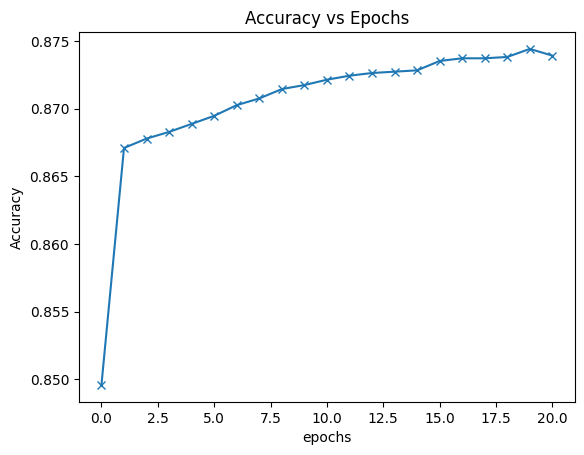

In [89]:
# plotting val acc
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

## Model Testing

In [90]:
test_dataset = MNIST(root='data/',
    train=False,
    transform=transforms.ToTensor()    
)

Shape:  torch.Size([1, 28, 28])
Label:  7


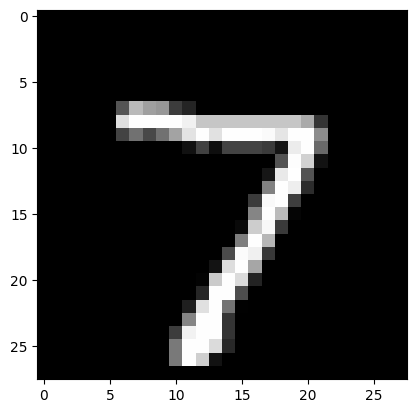

In [91]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print("Shape: ", img.shape)
print('Label: ', label)

In [92]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label:  7  , Predicted:  7


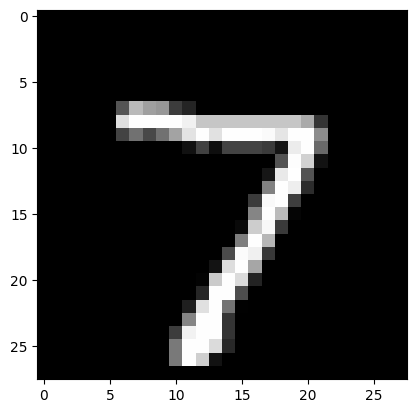

In [94]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ' , Predicted: ', predict_image(img, model))

Label:  0  , Predicted:  0


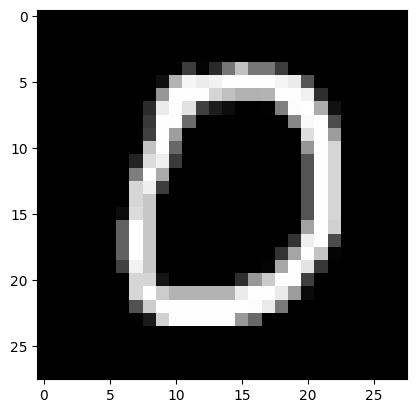

In [93]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ' , Predicted: ', predict_image(img, model))

Label:  9  , Predicted:  4


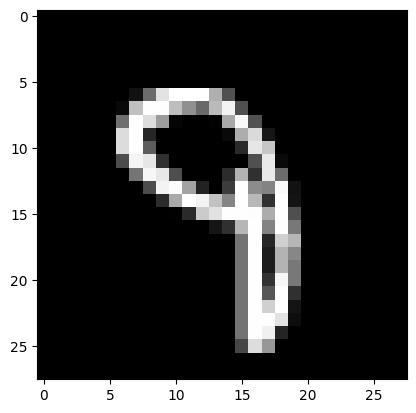

In [95]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ' , Predicted: ', predict_image(img, model))

Label:  2  , Predicted:  8


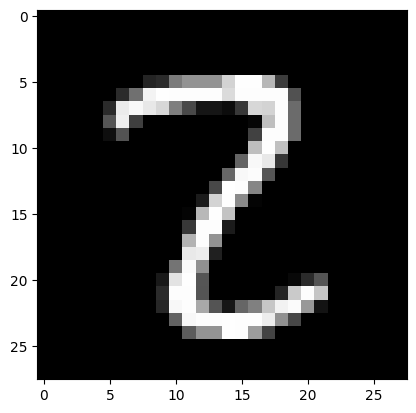

In [96]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ' , Predicted: ', predict_image(img, model))

In [97]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4425295889377594, 'val_acc': 0.88916015625}

## Saving and Loading Model

In [98]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0322,  0.0266, -0.0196,  ...,  0.0032, -0.0284, -0.0120],
                      [ 0.0096, -0.0297,  0.0105,  ..., -0.0095, -0.0178, -0.0317],
                      [ 0.0012, -0.0275, -0.0204,  ..., -0.0247,  0.0275, -0.0175],
                      ...,
                      [-0.0316,  0.0266, -0.0184,  ...,  0.0322, -0.0031,  0.0084],
                      [ 0.0189,  0.0344,  0.0096,  ...,  0.0190, -0.0355,  0.0173],
                      [ 0.0075,  0.0334,  0.0273,  ..., -0.0003, -0.0158, -0.0177]])),
             ('linear.bias',
              tensor([-0.0733,  0.1758, -0.0406, -0.0708,  0.0418,  0.1104, -0.0396,  0.1091,
                      -0.2140, -0.0234]))])

In [ ]:
# Saving model
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [100]:
# loading model
model2 = MnistModel()
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0189, -0.0061,  0.0264,  ..., -0.0067,  0.0103,  0.0240],
                      [ 0.0239,  0.0127, -0.0306,  ...,  0.0108, -0.0081,  0.0117],
                      [ 0.0177, -0.0357, -0.0098,  ..., -0.0010, -0.0141,  0.0117],
                      ...,
                      [-0.0031, -0.0339,  0.0083,  ...,  0.0038, -0.0309,  0.0013],
                      [-0.0286,  0.0199,  0.0236,  ...,  0.0355,  0.0026,  0.0104],
                      [ 0.0356,  0.0206,  0.0041,  ...,  0.0074, -0.0236,  0.0119]])),
             ('linear.bias',
              tensor([-0.0114, -0.0248, -0.0180,  0.0039, -0.0194, -0.0165,  0.0172, -0.0100,
                       0.0036,  0.0203]))])

In [101]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

/var/folders/wf/4wbt3__16t3c3myl_btnj_6r0000gn/T/ipykernel_10544/468328532.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logis

OrderedDict([('linear.weight',
              tensor([[-0.0322,  0.0266, -0.0196,  ...,  0.0032, -0.0284, -0.0120],
                      [ 0.0096, -0.0297,  0.0105,  ..., -0.0095, -0.0178, -0.0317],
                      [ 0.0012, -0.0275, -0.0204,  ..., -0.0247,  0.0275, -0.0175],
                      ...,
                      [-0.0316,  0.0266, -0.0184,  ...,  0.0322, -0.0031,  0.0084],
                      [ 0.0189,  0.0344,  0.0096,  ...,  0.0190, -0.0355,  0.0173],
                      [ 0.0075,  0.0334,  0.0273,  ..., -0.0003, -0.0158, -0.0177]])),
             ('linear.bias',
              tensor([-0.0733,  0.1758, -0.0406, -0.0708,  0.0418,  0.1104, -0.0396,  0.1091,
                      -0.2140, -0.0234]))])

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.4425295889377594, 'val_acc': 0.88916015625}